In [1]:
%matplotlib inline

from math import*
import matplotlib.pyplot as plt
import numpy as np
from array import*
from matplotlib.colors import LogNorm
import matplotlib.gridspec as gridspec
from IPython.display import HTML
from IPython.display import display
import matplotlib.mlab as mlab
from iminuit import Minuit, describe

In [2]:
import sys
sys.path.append("/Users/palacio/Work/workspace/Subatech/XenonNt/Radon/lib")
import rdEmanation as rdEmanation
import rdEmanationActivity as rdEmanationActivity 

# Emanation Measurement

## Measurement details:

**Detector:** MonA <br>
**Date:** 28.07.2019 <br>
**Sample:** Emanation of 25mm-pipe extracted on the 20190728 <br>
**Filling pressure:** ($1300\pm10)\,$mbar <br>
**Drift field:** $-1.\,$kV

**Description:** Emanation measurement extracted on the 250mm-pipe extraction of the 20190728." 

## Measurement parameters:

#### Emanation time of sample [d]:

In [3]:
#Enter emanation time in days
print ('\033[94m' + 'Beginning emanation: 2019/07/22 @ 19:30')
print ('\033[94m' + 'End emanation: 2019/07/27 @ ~17:00')

d = 4 #
h = 21 #
m = 30 #
s = 0 #

### The source was in equilibrium
t_e = (m + h*60 + d*24*60)/(60*24.)

#Enter error on emanation time in days. Usually neglible!
et_e = 15./60./24.

print ('\033[94m' + 'Emanation time of sample: ({:6.4f}'.format(t_e) + ' +/- {:2.4f}'.format(et_e) + ') days')

Beginning emanation: 2019/07/22 @ 19:30
End emanation: 2019/07/27 @ ~17:00
Emanation time of sample: (4.8958 +/- 0.0104) days


#### Measurement times [sec]:

In [4]:
#Time between emanation stop of the sample and the start of the measurement in seconds.
#NOTE: By default we cut the first 200 min of a run (-> grow-in of Po-214)!

print ('\033[94m' + 'Extraction finished on 2019/07/27 @ 18:45')
print ('\033[94m' + 'Measurement started on 2019/07/28 @ 11:24')

d1=0
h1=16
m1=39
s1=0
t1 = d1*3600.*24 + h1*3600.+m1*60.+s1

print ('\033[94m' + 'time between emanation stop and start of run: {:6.0f}'.format(t1) + ' seconds')

Extraction finished on 2019/07/27 @ 18:45
Measurement started on 2019/07/28 @ 11:24
time between emanation stop and start of run:  59940 seconds


#### File name:

In [5]:
mainPath='/Users/palacio/Work/Subatech/XENONnt/Radon/250mmPipe/data/20190728/'
infile = mainPath+'Ap28072019'

print ('\033[94m' + 'file name: ' + infile)

file name: /Users/palacio/Work/Subatech/XENONnt/Radon/250mmPipe/data/20190728/Ap28072019


#### Po selection channel windows [min-max]:

In [6]:
pol214min=rdEmanation.def_Pol_ranges('Pol_214_min')
pol214max=rdEmanation.def_Pol_ranges('Pol_214_max')
pol218min=rdEmanation.def_Pol_ranges('Pol_218_min')
pol218max=rdEmanation.def_Pol_ranges('Pol_218_max')
pol210min=rdEmanation.def_Pol_ranges('Pol_210_min')
pol210max=rdEmanation.def_Pol_ranges('Pol_210_max')

print ('\033[94m' + 'Po-214 selection window: [{:1.0f}'.format(pol214min) + ',' + '{:1.0f}'.format(pol214max) + '] channel')
print ('\033[94m' + 'Po-218 selection window: [{:1.0f}'.format(pol218min) + ',' + '{:1.0f}'.format(pol218max) + '] channel')
print ('\033[94m' + 'Po-210 selection window: [{:1.0f}'.format(pol210min) + ',' + '{:1.0f}'.format(pol210max) + '] channel')

Po-214 selection window: [275,360] channel
Po-218 selection window: [245,275] channel
Po-210 selection window: [180,245] channel


In [7]:
#Definition of the decay constants of radon and radium
lRn = rdEmanationActivity.lRn()
lRa = rdEmanationActivity.lRa()
lPo210 = rdEmanationActivity.lPo210()

## Quality plots

In [8]:
#LOAD DATA
indata = open(infile)
channel_s = array('i',[0])
timestamp_s = array('f',[0])
runtime_s = array('f',[0])
channel_1 = []
runtime_1 = []
timestamp_1 = []
data = [[],[]]

###runtime=0-> startUnixTime
startUnixTime = 1368550200

lineCount = 0
timeOff = 0

for line in indata:
    a = line.split(',')
    #a  = [ahelp.replace(',','.') for ahelp in aa]

    lineCount = lineCount +1

    for ebin in range(848):
        entries = float(a[ebin])
        
        if entries > 0:            
            numcounts = int(entries)

            for evt in range(numcounts):
                channel_s[0] = ebin
                timestamp_s[0] = (float(a[848]) - startUnixTime)
                runtime_s[0] = (float(a[849])/60)
                channel_1.append(channel_s[0])
                runtime_1.append(runtime_s[0])
                timestamp_1.append(timestamp_s[0])

In [9]:
tBlind=rdEmanation.blindingTime()

channel_Unblind = []
runtime_Unblind = []
channel_Blind = []
runtime_Blind = []
for i in range(0,len(channel_1)):
    if runtime_1[i] > tBlind:
        channel_Unblind.append(channel_1[i])
        runtime_Unblind.append(runtime_1[i])
    else:
        channel_Blind.append(channel_1[i])
        runtime_Blind.append(runtime_1[i])


/Users/palacio/.conda/envs/envPython3/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


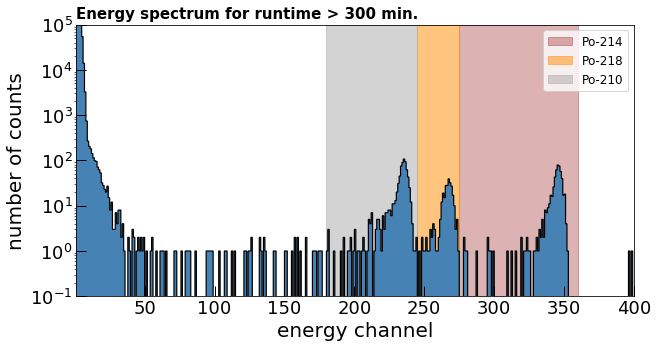

In [10]:
fig = plt.figure(figsize=(10,5))
t = np.arange(0., 500., 1)

bins = (max(channel_Unblind)-min(channel_Unblind))
plt.axvspan(pol214min, pol214max, alpha=0.3, color='darkred',label ='Po-214')
plt.axvspan(pol218min, pol218max, alpha=0.5, color='darkorange', label = 'Po-218')
plt.axvspan(pol210min, pol210max, alpha=0.5, color='darkgray', label = 'Po-210')
plt.hist(channel_Unblind, bins, normed=0, facecolor='steelblue',edgecolor = 'black',histtype='stepfilled',alpha = 1,linewidth = 1.2);

plt.yscale('log', nonposy='clip')
plt.xlabel('energy channel',fontsize=20)
plt.ylabel('number of counts',fontsize=20)

plt.xlim(1, 400)
#plt.ylim(0.1,find_max(channel_Unblind))
plt.ylim(0.1,1e5)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.legend(loc='upper right',fontsize = 'large')
plt.tick_params(direction='in', length=10, width=1, colors='black')
#plt.grid()
plt.title('Energy spectrum for runtime > {:3.0f}'.format(tBlind)+ ' min.',loc='left',fontsize = 15, weight = 'bold')
#plt.savefig("hexe_ptfe_blank.svg")

plt.show()

/Users/palacio/.conda/envs/envPython3/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  after removing the cwd from sys.path.
/Users/palacio/.conda/envs/envPython3/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


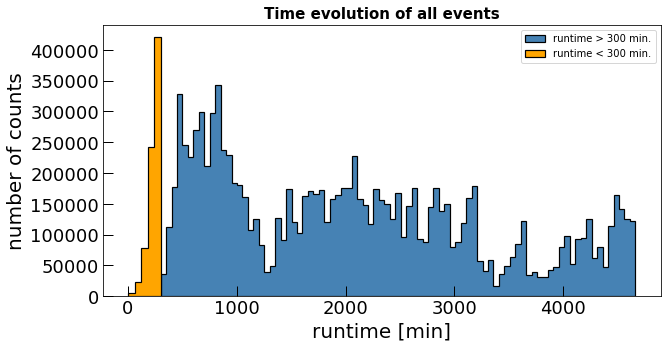

In [11]:
fig = plt.figure(figsize=(10,5))

binsUnblind = (max(runtime_Unblind)-min(runtime_Unblind)-1)/50#len(run_po212_1)/80
binsUnblindPo212 = plt.hist(runtime_Unblind, int(binsUnblind), normed=0, facecolor='steelblue',edgecolor = 'black',histtype='stepfilled',alpha = 1,linewidth = 1.2, label= 'runtime > {:3.0f}'.format(tBlind) + ' min.');
binsBlind = (max(runtime_Blind)-min(runtime_Blind)-1)/50#len(run_po212_1)/80
binsBlindPo212 = plt.hist(runtime_Blind, int(binsBlind), normed=0, facecolor='orange', edgecolor = 'black',histtype='stepfilled',alpha = 1,linewidth = 1.2, label= 'runtime < {:3.0f}'.format(tBlind) + ' min.');

#plt.yscale('log', nonposy='clip')
plt.xlabel('runtime [min]',fontsize=20)
plt.ylabel('number of counts',fontsize=20)
#plt.xlim(0.1, 800)
#plt.ylim(0.1,800)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.tick_params(direction='in', length=10, width=1, colors='black')
plt.title('Time evolution of all events',loc='center',fontsize = 15, weight = 'bold')
#plt.savefig("hexe_ptfe_blank.svg")
plt.legend()

plt.show()

In [12]:
channel_po214_Unblind = []
runtime_po214_Unblind = []
channel_po214_Blind = []
runtime_po214_Blind = []
for i in range(0,len(channel_1)):
    if ((channel_1[i] > pol214min) & (channel_1[i]<pol214max)) and runtime_1[i] > tBlind:
        channel_po214_Unblind.append(channel_1[i])
        runtime_po214_Unblind.append(runtime_1[i])
    elif ((channel_1[i] > pol214min) & (channel_1[i]<pol214max)) and runtime_1[i] < tBlind:
        channel_po214_Blind.append(channel_1[i])
        runtime_po214_Blind.append(runtime_1[i])       

        
channel_po218_Unblind = []
runtime_po218_Unblind = []
channel_po218_Blind = []
runtime_po218_Blind = []
for i in range(0,len(channel_1)):
    if ((channel_1[i] > pol218min) & (channel_1[i]<pol218max)) and runtime_1[i] > tBlind:
        channel_po218_Unblind.append(channel_1[i])
        runtime_po218_Unblind.append(runtime_1[i])
    elif ((channel_1[i] > pol218min) & (channel_1[i]<pol218max)) and runtime_1[i] < tBlind:
        channel_po218_Blind.append(channel_1[i])
        runtime_po218_Blind.append(runtime_1[i])        
       

    
channel_po210_Unblind = []
runtime_po210_Unblind = []
channel_po210_Blind = []
runtime_po210_Blind = []
for i in range(0,len(channel_1)):
    if ((channel_1[i] > pol210min) & (channel_1[i]<pol210max)) and runtime_1[i] > tBlind:
        channel_po210_Unblind.append(channel_1[i])
        runtime_po210_Unblind.append(runtime_1[i])
    elif ((channel_1[i] > pol210min) & (channel_1[i]<pol210max)) and runtime_1[i] < tBlind:
        channel_po210_Blind.append(channel_1[i])
        runtime_po210_Blind.append(runtime_1[i])        

# Correction factors:

### Emanation equilibrium
**c1:** The emanation sample did not reach its emanation equilibrium yet.

In [16]:
# calculate the source strength after emanation time te
c1 = rdEmanationActivity.source_strength(t_e,lRn)
ec1 = rdEmanationActivity.err_source_strength(t_e, et_e,lRn)

print ('\033[94m' + 'c1 after emanation time t_e: ({:6.3f}'.format(c1) + '+/-' + '{:6.3f}'.format(ec1) + ')')

c1 after emanation time t_e: ( 0.605+/- 0.004)


### Decay before measurement
**c2:** Some of the sample has been decayed before the start of DAQ.

In [17]:
c2 = rdEmanationActivity.decay_before_measurement(t1,lRn)
print ('\033[94m' + 'c1 after time t1: {:6.3f}'.format(c2))

c1 after time t1:  0.998


We do not assume here an error. The uncertainty on the emanation stop is already considered in the error on c1 (**cross-check this argumentation**).

### c3: extracted gas fraction
***c3:*** Only a fraction of the sample has been extracted (not pumped to 0 mbar).

The correction factor needs to be calculated depending on the measurement procedure:
- We assume 100% of the source was trapped

In [18]:
p0 = 1000
p1 = 0.
ep = 10.

c3 = rdEmanationActivity.gas_extracted(p0,p1)
ec3 = rdEmanationActivity.error_gas_extracted(p0,p1,ep)
print ('\033[94m' + 'c1 after time t1: ({:6.3f}'.format(c3) + '+/-' + '{:6.3f}'.format(ec3)+ ')' )

c1 after time t1: ( 1.000+/- 0.010)


#  Measured Po-214 activity

## Po-214 efficiency
**Measured** on the 20190817

**NOTE:** The detection efficiency can change with detector parameters (high voltage) but also as a consequence of a different gas composition.


In [17]:
ef = 0.21
eef = 0.01

print ('\033[94m' + 'detection efficiency (measured at 2019.08.17): ({:3.2f}'.format(ef) + '+/-' + '{:3.2f}'.format(eef) + ')')

detection efficiency (measured at 2019.08.17): (0.21+/-0.01)


### Method 1
Activity measurement based on the number of Po-214 events

The activity filled into the detector (i.e. the activity when started the measurement) is generally given by
$$A = \frac{c\cdot \lambda_{Rn}}{\epsilon} \cdot \frac{1}{1-e^{-\lambda_{Rn}\cdot \Delta t}}$$
Where $c$ is the number of counts, $\epsilon$ the detector efficiency and $\Delta t$ the run time of the measurement.

/Users/palacio/.conda/envs/envPython3/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


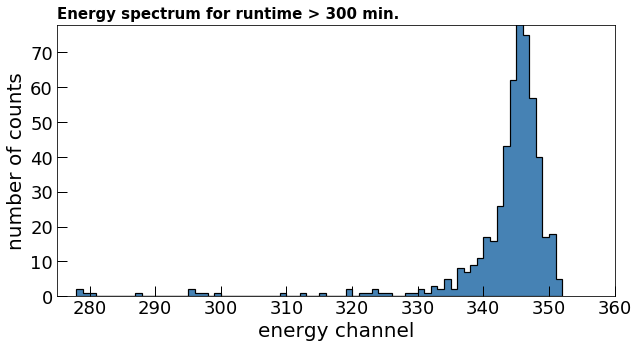

In [18]:
fig = plt.figure(figsize=(10,5))
t = np.arange(0., 500., 1)

binsUnblind = (max(channel_po214_Unblind)-min(channel_po214_Unblind))
plt.axvspan(650, 750, alpha=0.5, color='darkgray')
plt.hist(channel_po214_Unblind, binsUnblind, normed=0, facecolor='steelblue',edgecolor = 'black',histtype='stepfilled',alpha = 1,linewidth = 1.2);

#plt.yscale('log', nonposy='clip')
plt.xlabel('energy channel',fontsize=20)
plt.ylabel('number of counts',fontsize=20)
plt.xlim(pol214min, pol214max)
plt.ylim(0,rdEmanation.find_max(channel_po214_Unblind))
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
#plt.legend(loc='upper right',fontsize = 'large')
plt.tick_params(direction='in', length=10, width=1, colors='black')
#plt.grid()
plt.title('Energy spectrum for runtime > {:3.0f}'.format(tBlind) + ' min.',loc='left',fontsize = 15, weight = 'bold')
#plt.savefig("hexe_ptfe_blank.svg")

plt.show()

In [26]:
# definition of t2 in case the first 200 min have bin cut
t2 = t1 - tBlind*60 + (int(runtime_1[len(runtime_1)-1]))*60.

In [27]:
#calculation of the activity
A = rdEmanationActivity.act(len(channel_po214_Unblind),t1,t2,ef,lRn)/(c1*c2*c3)
eA = rdEmanationActivity.err_act(len(channel_po214_Unblind),t1,t2,ef,eef,lRn)

# accounting for the errors of the correction factors
eeA = rdEmanationActivity.err_act_factors(A,eA,c1,ec1,c2,c3,ec3)


print ('\033[94m' + 'MEASURED ACTIVITY: ({:6.4f}'.format(A) + '+/-' + '{:6.4f}'.format(eeA)+ ') Bq' )


NameError: name 'c1' is not defined

### Method 2
We fit the Po-214 decay events with and exponential function

/Users/palacio/.conda/envs/envPython3/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  after removing the cwd from sys.path.
/Users/palacio/.conda/envs/envPython3/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


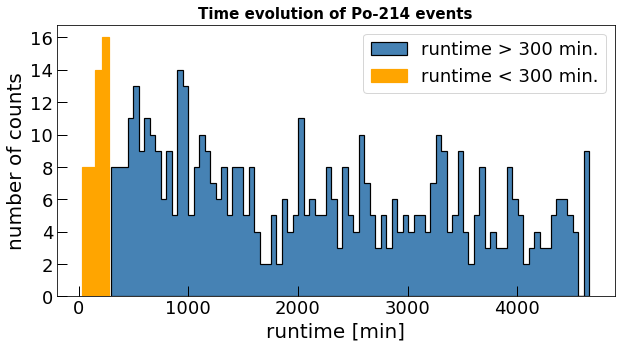

In [19]:
fig = plt.figure(figsize=(10,5))

binsUnblind = (max(runtime_po214_Unblind)-min(runtime_po214_Unblind)-1)/50.#len(run_po212_1)/80
histPol214=plt.hist(runtime_po214_Unblind, int(binsUnblind), normed=0, facecolor='steelblue',edgecolor = 'black',histtype='stepfilled',alpha = 1,linewidth = 1.2, label ='runtime > {:3.0f}'.format(tBlind) + ' min.');
binsBlind = (max(runtime_po214_Blind)-min(runtime_po214_Blind)-1)/50.#len(run_po212_1)/80
plt.hist(runtime_po214_Blind, int(binsBlind), normed=0, facecolor='orange',edgecolor = 'orange',histtype='stepfilled',alpha = 1,linewidth = 1.2, label ='runtime < {:3.0f}'.format(tBlind) + ' min.');

#plt.yscale('log', nonposy='clip')
plt.xlabel('runtime [min]',fontsize=20)
plt.ylabel('number of counts',fontsize=20)
#plt.xlim(0.1, 800)
#plt.ylim(0.1,800)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.tick_params(direction='in', length=10, width=1, colors='black')
plt.title('Time evolution of Po-214 events',loc='center',fontsize = 15, weight = 'bold')
#plt.savefig("hexe_ptfe_blank.svg")
plt.legend(loc='upper right',fontsize = '18')


plt.show()

In [28]:
# define hist_x and hist_y from plot above
histPol214_x_long=histPol214[1]
binWidth=(histPol214_x_long[2]-histPol214_x_long[1])
histPol214_y=histPol214[0]
histPol214_x=np.empty(np.size(histPol214_y))
histPol214_y_norm=np.empty(np.size(histPol214_y))


for  i in range(0,len(histPol214_x)):
    histPol214_x[i]=(histPol214_x_long[i]+histPol214_x_long[i+1])/2
    
    histPol214_y_norm[i]=histPol214_y[i]/binWidth

In [21]:
# Define x^2-function which needs to be minimized.
"""
Author: Joaquim Palacio
Date: 2019/10/31
Description: exponential decay of Rn-214
Variables:
t = time [min]
Ao = A(t=t_0) = Rn-222 decayed atoms at t=t_0
_lambda = Rn-222 decay rate: (-log(0.5)/(3.84*24*60)) [1/min]

Return = number of decayed Rn-222 atoms/min vs time 
"""
def pol214_expo(t,Ao,lambda_):
    return Ao * np.exp(-t*lambda_)
    

# Define x^2-function which needs to be minimized.
"""
Author: Joaquim Palacio
Date: 2019/10/31
Description: exponential decay of Rn-222 to fit in the likelihood
Ao = A(t=t_0) = number of Rn-222 atoms at t=t_0
_lambda = Rn-222 decay rate: (-log(0.5)/(3.84*24*60)) [1/min]

Return = Likelihood defined by 
  Chi2 = [y_data-f(x_data)]**2/sigma_data**2
"""
def pol214_expo_fit(Ao,lambda_):
    s_terms=0

    #xdata = hist_x[i]
    #ydata = hist_y[i]
    #delta_ydata = sqrt(hist_y[i])
    #f(x) = A * np.exp(-x*B)
    
    for i in range(0,len(histPol214_x)-1):
        # Ignore empty bins (not super correct...)
        if histPol214_y[i] == 0.:
            continue
        
        term = (histPol214_y[i]-(Ao * np.exp(-histPol214_x[i]*lambda_)))**2/histPol214_y[i]
        s_terms = s_terms + term

    return s_terms  

#import minuit, describe
describe(pol214_expo_fit)

['N', 'lambda_']

In [22]:
lRn_min = lRn*60.

#mm = Minuit(pol214_expo_fit, Ao = 10, lambda_ = lRn_min, limit_Ao = (1,50) , limit_lambda_ = (0.,10.));
mm = Minuit(pol214_expo_fit, Ao= 30, limit_Ao = (1,50), lambda_ = lRn_min, limit_lambda_ = (lRn_min*(1-0.001),lRn_min*(1+0.001)));



/Users/palacio/.conda/envs/envPython3/lib/python3.7/site-packages/ipykernel_launcher.py:3: InitialParamWarning: Parameter N is floating but does not have initial step size. Assume 1.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/palacio/.conda/envs/envPython3/lib/python3.7/site-packages/ipykernel_launcher.py:3: InitialParamWarning: Parameter lambda_ is floating but does not have initial step size. Assume 1.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/palacio/.conda/envs/envPython3/lib/python3.7/site-packages/ipykernel_launcher.py:3: InitialParamWarning: errordef is not given. Default to 1.
  This is separate from the ipykernel package so we can avoid doing imports until


In [23]:
mm.migrad()

------------------------------------------------------------------
| FCN = 82.41                   |      Ncalls=48 (48 total)      |
| EDM = 9.16E-06 (Goal: 1E-05)  |            up = 1.0            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
---------------------------------------------------------------------------------------------
|   | Name    |   Value   | Hesse Err | Minos Err- | Minos Err+ | Limit-  | Limit+  | Fixed |
---------------------------------------------------------------------------------------------
| 0 | N       |    8.1    |    0.9    |            |            |    1    |   50    |       |
| 1 | lambda_ |  1.9E-4   |  0.4E-4   |            |            |    0    |   10    |       |
---------------------------------------------------------------------------------------------

In [24]:
print(mm.get_param_states())

A0_fit=mm.values[0]             ## [events in bin zero]
delta_A0_fit=mm.errors[0]       ## [events in bin zero]
lambda_fit=mm.values[1]         ## [1/bin]
delta_lambda_fit=mm.errors[1]   ## [1/bin]

print('')
print('Ao = {:3.1f}'.format(A0_fit) + ' +- {:3.1f}'.format(delta_A0_fit)+ ' decayed particles/bin0')
print('lambda = {:1.2e}'.format(lambda_fit) + ' +- {:1.2e}'.format(delta_lambda_fit)+ ' 1/bin')

## We take into account the number of empty bins for computing the chi2
numEmptyBins=np.size(histPol214_y[histPol214_y==0])
chi2=mm.fval / (len(histPol214_y)-numEmptyBins - 2)
print('Reduced chi2: {:1.2}'.format(chi2))

---------------------------------------------------------------------------------------------
|   | Name    |   Value   | Hesse Err | Minos Err- | Minos Err+ | Limit-  | Limit+  | Fixed |
---------------------------------------------------------------------------------------------
| 0 | N       |    8.1    |    0.9    |            |            |    1    |   50    |       |
| 1 | lambda_ |  1.9E-4   |  0.4E-4   |            |            |    0    |   10    |       |
---------------------------------------------------------------------------------------------

N = 8.1 +- 0.9
lambda = 0.000193 +- 0.000044
Reduced chi2: 0.98


---------------------------------------------------------------------------------------------
|   | Name    |   Value   | Hesse Err | Minos Err- | Minos Err+ | Limit-  | Limit+  | Fixed |
---------------------------------------------------------------------------------------------
| 0 | N       |    8.1    |    0.9    |            |            |    1    |   50    |       |
| 1 | lambda_ |  1.9E-4   |  0.4E-4   |            |            |    0    |   10    |       |
---------------------------------------------------------------------------------------------


/Users/palacio/.conda/envs/envPython3/lib/python3.7/site-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.


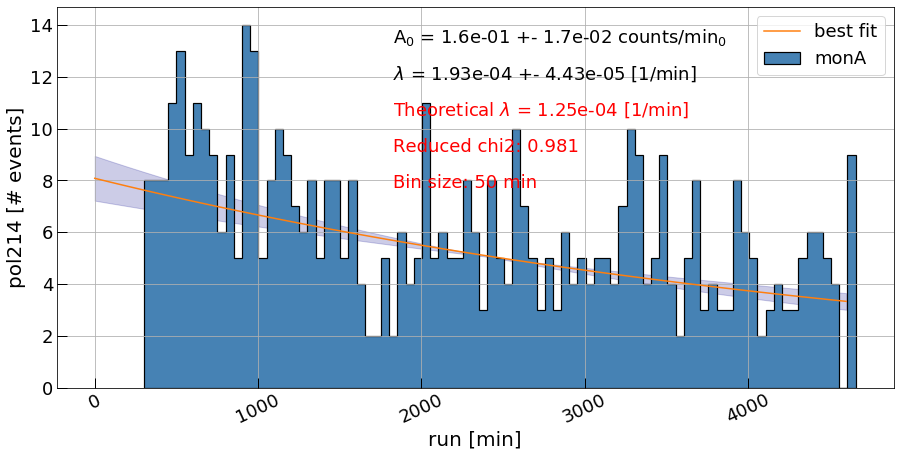

In [25]:
fig = plt.figure(figsize=(15,7))

xx = []
yy = []
yy_l = []
yy_u = []


for i in range(0,int(max(runtime_po214_Unblind)),100):
    xx.append(i)
    yy.append(pol214_expo(i,A0_fit,lambda_fit))
    yy_l.append(pol214_expo(i,A0_fit + delta_A0_fit, lambda_fit + delta_lambda_fit ))
    yy_u.append(pol214_expo(i,A0_fit - delta_A0_fit, lambda_fit - delta_lambda_fit))

    
plt.hist(runtime_po214_Unblind, int(binsUnblind), normed=0, facecolor='steelblue',edgecolor = 'black',histtype='stepfilled',alpha = 1,linewidth = 1.2, label='monA');
#plt.scatter(histPol214_x, histPol214_y)
#plt.scatter(histPol214_x, histPol214_y_norm)

plt.plot(xx,yy,linewidth = 1.5, label='best fit')
plt.plot(xx,yy_l,linestyle = '')
plt.plot(xx,yy_u,linestyle = '')
plt.fill_between(xx,yy_l,yy_u, color='darkblue', alpha='0.2')


numBinPlot=70
plt.text(histPol214_x[numBinPlot], np.max(histPol214_y)*0.95, r'A$_0$ = {:3.1e}'.format(A0_fit/binWidth) + ' +- {:3.1e}'.format(delta_A0_fit/binWidth) + ' counts in min$_0$',fontsize=18)
plt.text(histPol214_x[numBinPlot], np.max(histPol214_y)*0.85, r'$\lambda$ = {:3.2e}'.format(lambda_fit) + ' +- {:3.2e}'.format(delta_lambda_fit) + ' [1/min]' ,fontsize=18)
plt.text(histPol214_x[numBinPlot], np.max(histPol214_y)*0.75, r'Reduced chi2: {:1.2f}'.format(chi2),fontsize=18)
plt.text(histPol214_x[numBinPlot], np.max(histPol214_y)*0.65, r'Bin size: {:1.0f}'.format(binWidth)+' min',fontsize=18)
activity = rdEmanation.standard_strength(a_s,t_e,lRn)
plt.text(histPol214_x[numBinPlot], np.max(histPol214_y)*0.55, r'A$_0^t$ = {:3.2f}'.format(activity*60) + ' counts in min$_0$ ($\epsilon$ = {:3.2f}'.format((A0_fit/binWidth)/(activity*60))+')', color = 'red', fontsize=18)
plt.text(histPol214_x[numBinPlot], np.max(histPol214_y)*0.45, r'$\lambda^t$ = {:3.2e}'.format(lRn*60.) + ' [1/min]', color = 'red', fontsize=18)

plt.xlabel('',fontsize=20)
plt.title('Po-214 events ',fontsize=20)
plt.xlabel('run time [min]')
plt.ylabel('Po-222 decayed events [# events]',fontsize=20)

#plt.xlim(250,350)
#plt.ylim(1e-2,2000)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.legend(loc='upper right',fontsize = '18')
plt.tick_params(direction='in', length=10, width=1, colors='black')
plt.xticks( rotation=25 )
plt.grid()
#plt.savefig("spectra_po210.svg")


plt.show()

- Calculate here the activity at time equal zero
- From the activity, 

# Po-214 / Po-218 ratio and Po-210 rate evolution

The ratio of Po-218 and Po-214 events turned out to be an indicator for a change in the collection efficiency of the radon daughters.


In [20]:
Po_ratio_214_218 = rdEmanationActivity.element_ratio(len(channel_po214_Unblind),len(channel_po218_Unblind))
ePo_ratio_214_218 = rdEmanationActivity.element_ratio(len(channel_po214_Unblind),len(channel_po218_Unblind))

print ('\033[1m' + 'Po-214 / Po-218 ratio: ({:6.3f}'.format(Po_ratio_214_218) + ' +/- {:2.3}'.format(ePo_ratio_214_218) + ') ')

Po-214 / Po-218 ratio: ( 1.377 +/- 1.38) 


**NOTE:**
- $\color{red}{\text{}}$

The Po-210 rate, on the other hand is expected to be constant due to the long half-life of Pb-210 (>20 years). Any non constant behaviour might indicate noise contamination.

/Users/palacio/.conda/envs/envPython3/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  after removing the cwd from sys.path.
/Users/palacio/.conda/envs/envPython3/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


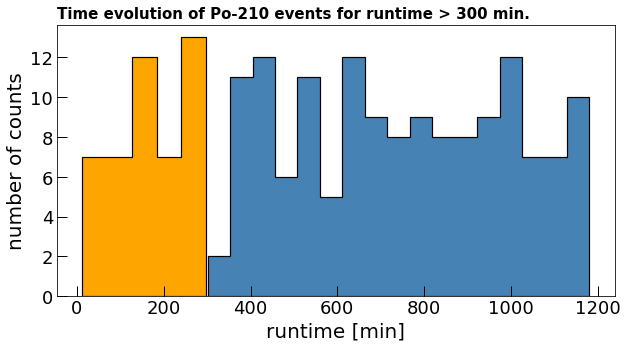

In [21]:
fig = plt.figure(figsize=(10,5))

binsUnblind = (max(runtime_po210_Unblind)-min(runtime_po210_Unblind)-1)/50
plt.hist(runtime_po210_Unblind, int(binsUnblind), normed=0, facecolor='steelblue',edgecolor = 'black',histtype='stepfilled',alpha = 1,linewidth = 1.2);
binsBlind = (max(runtime_po210_Blind)-min(runtime_po210_Blind)-1)/50
plt.hist(runtime_po210_Blind, int(binsBlind), normed=0, facecolor='orange',edgecolor = 'black',histtype='stepfilled',alpha = 1,linewidth = 1.2);

#plt.yscale('log', nonposy='clip')
plt.xlabel('runtime [min]',fontsize=20)
plt.ylabel('number of counts',fontsize=20)
#plt.xlim(0.1, 800)
#plt.ylim(0.1,800)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.tick_params(direction='in', length=10, width=1, colors='black')
plt.title('Time evolution of Po-210 events for runtime > {:3.0f}'.format(tBlind) + ' min.',loc='left',fontsize = 15, weight = 'bold')
#plt.savefig("hexe_ptfe_blank.svg")

plt.show()

# Po-210 activity

In [22]:
activityPo210=rdEmanationActivity.act(len(channel_po210_Blind)+len(channel_po210_Unblind),0,max(runtime_Unblind)*60,1,lPo210)
eactivityPo210=rdEmanationActivity.err_act(len(channel_po210_Blind)+len(channel_po210_Unblind),0,max(runtime_Unblind)*60,1,0,lPo210)

print ('\033[1m' + 'activity Po-210: ({:6.3f}'.format(activityPo210*1000) + ' +/- {:2.3}'.format(eactivityPo210*1000) + ' mBq) ')

activity Po-210: ( 2.687 +/- 0.194 mBq) 


### Calculation of activity induced in future calibration measurement
We calculate now the activity induced on the calibration measurement.
This number is used to calculate the efficiency of monA.

In [15]:
print ('\033[94m' + 'A(t) = Ao * e^(-t*lambda_)')
print ('')
print ('\033[94m' + 'Where:')
print ('\033[94m' + 'Ao = {:3.1e}'.format(A0) + ' +- {:3.1e}'.format(mm.errors[0]/binWidth) + ' counts/min0')
print ('\033[94m' + 'lambda_ = {:3.2e}'.format(mm.values[1]) + ' +- {:3.2e}'.format(mm.errors[1]) + ' [1/min]')
print ('')
print ('\033[94m' + 'Emanation measurement started on 2019/07/28 @ 11:24')
print ('\033[94m' + 'Calibration measurement started on 2019/08/17 @ 14:25')

d2=20
h2=3
m2=1
s2=0

minutes=(d2*24*60 + h2*60 + m2 +s2/60.)
activity=pol214_expo(minutes,A0,mm.values[1])
print ('\033[94m' + 'Minutes passed between emanation and calibration measured = {:3.0f}'.format(minutes))
print ('')
print ('\033[94m' + 'Activity induced = {:3.0e}'.format(activity)+' decay events/min0')

A(t) = Ao * e^(-t*lambda_)

Where:


NameError: name 'A0' is not defined

In [24]:
HTML('''<script>
code_show=false; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')